# **Lab Session : Feature extraction**

Author: Vanessa Gómez Verdejo (http://vanessa.webs.tsc.uc3m.es/)

Updated: 27/02/2017 (working with sklearn 0.18.1)

In this lab session we are going to work with some of the most well-known feature extraction techniques, three MVA approaches: PCA, PLS and CCA, and the Linear Discrmination Analysis (LDA).

We will start working over a face detection problem where we will be able to test the performance improvements provided by the feature extraction process and, besides, from a qualitative point of view, analyze the extracted features by means of plotting the eigenvectors defining the feature extraction process. 

To analyze the discriminatory capability of the extracted features, let's use a linear SVM as classifier and analyze its final accuracy over the test data to evaluate the goodness of the different feature extraction methods.

To implement the different approaches we will base on [Scikit-Learn](http://scikit-learn.org/stable/) python toolbox.

#### ** During this lab we will cover: **
#### *Part 1: Linear feature selection* 
##### *   Part 1.1: Unsupervised feature selection: PCA* 
##### *   Part 1.2: Supervised feature selection: PLS,  CCA & LDA* 

As you progress in this notebook, you will have to complete some exercises. Each exercise includes an explanation of what is expected, followed by code cells where one or several lines will have written down `<FILL IN>`.  The cell that needs to be modified will have `# TODO: Replace <FILL IN> with appropriate code` on its first line.  Once the `<FILL IN>` sections are updated and the code can be run; below this cell, you will find the test cell (beginning with the line `# TEST CELL`) and you can run it to verify the correctness of your solution.  

In [52]:
%matplotlib inline

## ** Part 0: Download and prepare the data **

The dataset consists of ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).
    
The next code includes the lines to download this data set and create the training, validation and test data partitions, as well as normalize them.


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces 
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays
print 'The first time that you downlaod the data it can take a while...'
olivetti_people = fetch_olivetti_faces()

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = olivetti_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = olivetti_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
Y = olivetti_people.target
n_classes = np.unique(Y).shape[0]

print("Dataset size information:")
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


###############################################################################
# Preparing the data

# Initialize the random generator seed to compare results
np.random.seed(1)

# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# split into a training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.333)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Binarize the labels for supervised feature extraction methods
set_classes = np.unique(Y)
Y_train_bin = label_binarize(Y_train, classes=set_classes)

print("Number of training samples: %d" % X_train.shape[0])
print("Number of validation samples: %d" % X_val.shape[0])
print("Number of test samples: %d" % X_test.shape[0])

The first time that you downlaod the data it can take a while...
Dataset size information:
n_features: 4096
n_classes: 40
Number of training samples: 200
Number of validation samples: 100
Number of test samples: 100


** Representing some example faces **

Next cells include the plot_gallery( ) function, which let you plot any of the face images from the data set and in later sections plot the eigenvectors provided by the feature selection process. Besides, as an example, the function is used to plot some training data.

In [4]:
import matplotlib.pyplot as plt
def plot_gallery(images, titles, h, w, n_row=4, n_col=10):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(images.shape[0]):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [9]:
# As example, we plot a face of each class (or person)
titles = ['class '+str(c) for c in set_classes]
ind_faces = [np.where(Y_train == c)[0][0] for c in set_classes]

plot_gallery(X_train[ind_faces,:], titles, h, w)

## *Part 1: Linear feature selection* 

### ** Part 1.1: Unsupervised feature selection: PCA **

Here, let's use the [PCA( )](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) method to find the projections maximizing the variance of the projected data. Complete next cell to obtain:
* The first 100 projection vectors from the training data.
* The projections of training, validation and test data in this new space.
* The dimensions (number of data and number of features) of the projected data.

Use the methods .fit( ), fit_transform( ) and transform ( ) of the pca object to solve the exercise. 

In [10]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
from sklearn.decomposition import PCA

N_feat_max=100
# Define and train pca object
pca = PCA(n_components=N_feat_max)
pca.fit(X_train, Y_train)

# Project the training, validation and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

# Compute new dimensions
dim_train = X_train_pca.shape
dim_val = X_test_pca.shape
dim_test = X_val_pca.shape

print 'Dimensions of training data are: ' + str(dim_train)
print 'Dimensions of validation data are: ' + str(dim_val)
print 'Dimensions of test data are: ' + str(dim_test)

Dimensions of training data are: (200L, 100L)
Dimensions of validation data are: (100L, 100L)
Dimensions of test data are: (100L, 100L)


In [11]:
###########################################################
# TEST CELL
###########################################################

from test_helper import Test

# TEST Training and test data generation
Test.assertEquals(dim_train, (200, 100), 'incorrect result: training data dimensions are uncorrect')
Test.assertEquals(dim_val, (100, 100), 'incorrect result: validation data dimensions are uncorrect')
Test.assertEquals(dim_test, (100, 100), 'incorrect result: test data dimensions are uncorrect')


1 test passed.
1 test passed.
1 test passed.


** Analyzing eigenvectors **

Execute the following code to plot the first eigenvectors. The analysis of eigenvectors in face detection problems is quite common, in fact, they are known as eigenfaces. Note that to construct each new feature, each input face is projected over the eigenfaces and a new value (new feature) is obtained for each eigenvector. Lighter regions of the eigenfaces will contribute positively to generate the new feature, whereas darkness regions will contribute negatively.

In [12]:
# Plot eigenfaces
n_eigenfaces=20
titles = ['Eigenface '+str(num) for num in range(n_eigenfaces)]
eigenfaces = pca.components_.reshape((N_feat_max, h, w))
plot_gallery(eigenfaces[:n_eigenfaces,:,:], titles, h, w, n_row=2, n_col=10)

** Evaluating performance **

Here let's use a linear SVM to evaluate the discriminatory capability of the extracted features. Complete next code to design the function SVM_accuracy_evolution( ) which has to be able to compute the training, validation and test accuracies of a linear SVM (with the default penalty parameter) for the number of extracted features given in the parameter 'rang\_feat'.

Last code lines let you run this function with the PCA projections.

In [13]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn import svm
from sklearn.model_selection import GridSearchCV

def SVM_accuracy_evolution(X_train_t, Y_train, X_val_t, Y_val, X_test_t, Y_test, rang_feat):
    """Compute the accuracy of training, validation and test data for different the number of features given
        in rang_feat.

    Args:
        X_train_t (numpy dnarray): training data projected in the new feature space (number data x number dimensions).
        Y_train (numpy dnarray): labels of the training data (number data x 1).
        X_val_t (numpy dnarray): validation data projected in the new feature space (number data x number dimensions).
        Y_val (numpy dnarray): labels of the validation data (number data x 1).
        X_test_t (numpy dnarray): test data projected in the new feature space (number data x number dimensions).
        Y_test (numpy dnarray): labels of the test data (number data x 1).
        rang_feat: range with different number of features to be evaluated                                           
   
    """
    
    # Define the model to train a liner SVM and adjust by CV the parameter C
    clf = svm.SVC(kernel='linear')
    acc_tr = []
    acc_val = []
    acc_test = []
    for i in rang_feat:
        # Train SVM classifier
        rang_C = np.logspace(-2,2,10)
        tuned_parameter = [{'C': rang_C}]
        clf_SVM = GridSearchCV(clf, tuned_parameter)
        clf_SVM.fit(X_train_t[:,0:i], Y_train)
        # Compute accuracies
        acc_tr.append(clf_SVM.score(X_train_t[:,0:i],Y_train))
        acc_val.append(clf_SVM.score(X_val_t[:,0:i],Y_val))
        acc_test.append(clf_SVM.score(X_test_t[:,0:i],Y_test))

    return np.array(acc_tr), np.array(acc_val), np.array(acc_test)
                    
# Run the function with the pca extracted features                    
rang_feat = np.arange(5, N_feat_max, 10) # To speed up the execution, we use steps of 10 features.
[acc_tr, acc_val, acc_test] = SVM_accuracy_evolution(X_train_pca, Y_train, X_val_pca, Y_val, X_test_pca, Y_test, rang_feat)

C:\Users\Alex\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


To make easier evaluate the above computed accuracies, next code let you plot the train, validation and test accuracies. Have a look to function plot\_accuracy\_evolution( ) which will be used in the following sections. 

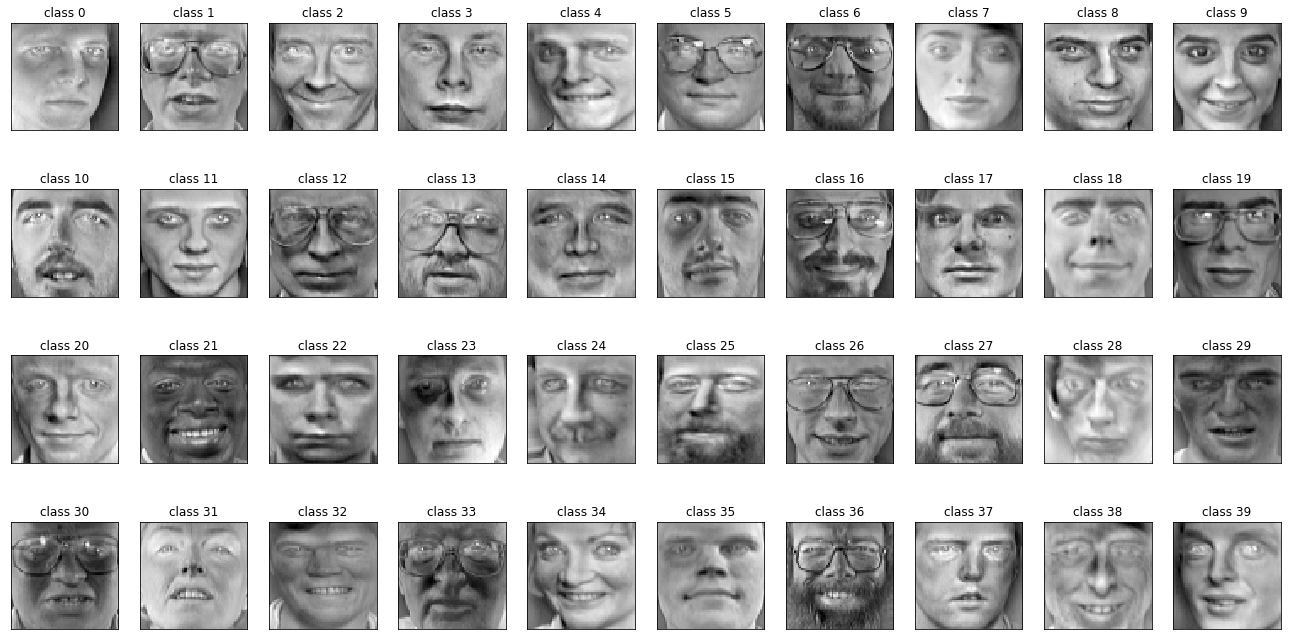

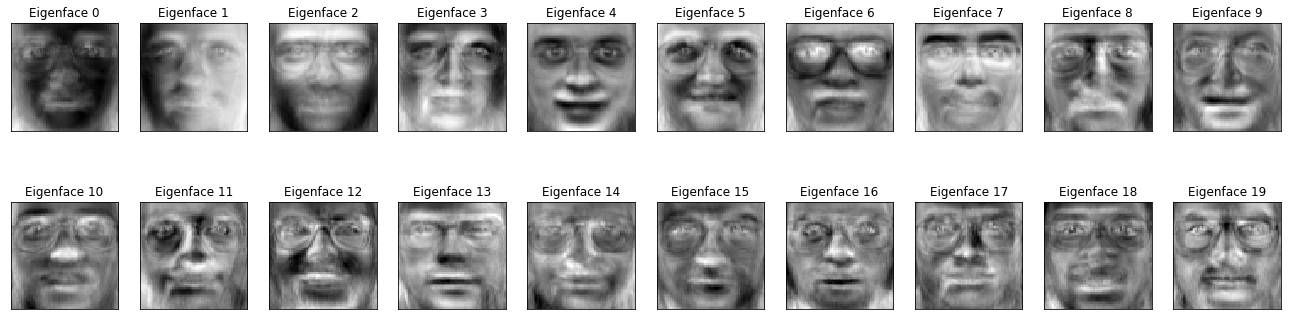

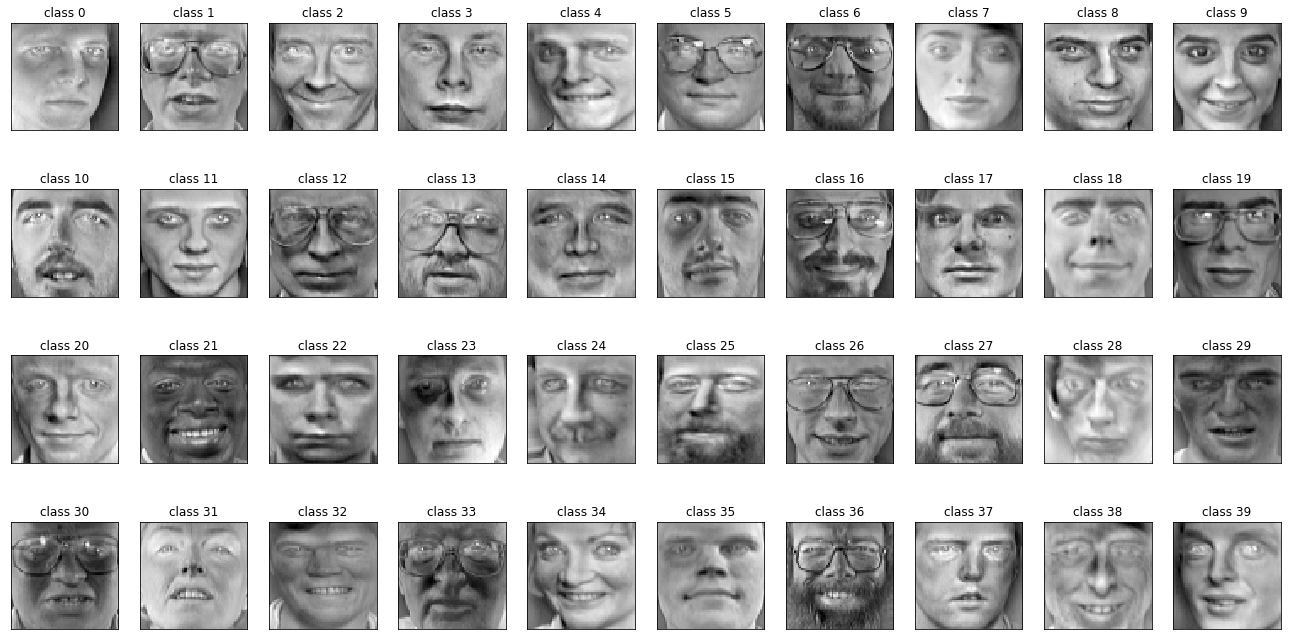

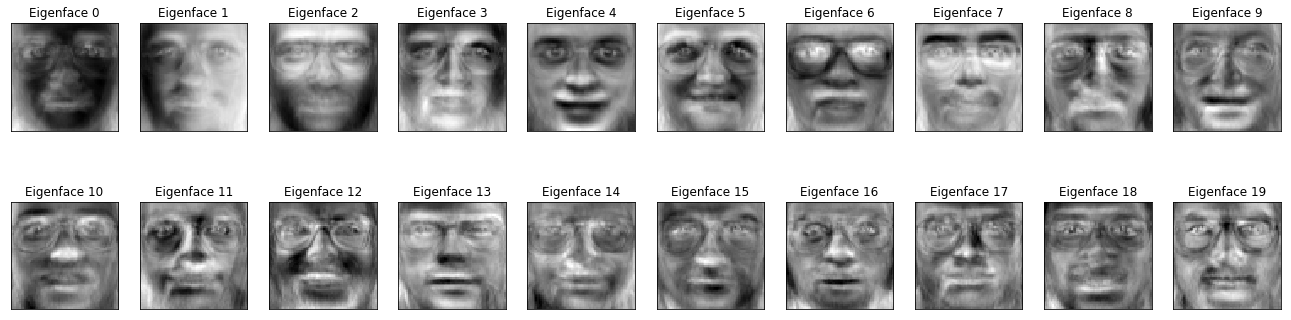

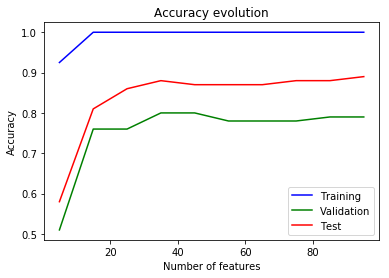

In [14]:
import matplotlib.pyplot as plt

def plot_accuracy_evolution(rang_feat, acc_tr, acc_val, acc_test):
    """Plot the accuracy evolution for training, validation and test data sets.

    Args:
        rang_feat: range with different number of features where the accuracy has been evaluated   
        acc_tr: numpy vector with the training accuracies
        acc_val: numpy vector with the validation accuracies
        acc_test: numpy vector with the test accuracies                                          
   
    """
    plt.plot(rang_feat, acc_tr, "b", label="train")
    plt.plot(rang_feat, acc_val, "g", label="validation")
    plt.plot(rang_feat, acc_test, "r", label="test")
    plt.xlabel("Number of features")
    plt.ylabel("Accuracy")
    plt.title('Accuracy evolution')
    plt.legend(['Training', 'Validation', 'Test'], loc = 4)
    

# Plot it!
plt.figure()
plot_accuracy_evolution(rang_feat, acc_tr, acc_val, acc_test)
plt.show()

** Select the optimum number of features **

Use the validation accuracy vector to obtain optimum number of features and provide the test error for this number of features. Function argmax( ) of numpy library may help you.

In [15]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

# Find the optimum number of features
pos_max = np.argmax(acc_val)
num_opt_feat = rang_feat[pos_max]
test_acc_opt = acc_test[pos_max]
print 'Number optimum of features: ' + str(num_opt_feat)
print("The optimum test accuracy is  %2.2f%%" %(100*test_acc_opt))

Number optimum of features: 35
The optimum test accuracy is  88.00%


In [16]:
###########################################################
# TEST CELL
###########################################################

from test_helper import Test

# TEST Training and test data generation
Test.assertEquals(num_opt_feat, 35, 'incorrect result: number of optimum dimensions is uncorrect')
Test.assertEquals(np.round(test_acc_opt,4), 0.8800, 'incorrect result: test accuracy is uncorrect')


1 test passed.
1 test passed.


### ** Part 1.2: Supervised feature extraction: PLS, CCA & LDA **

In this section, we are going to analyze the advantages of using supervised feature extraction techniques, such as, Partial Least Squares (PLS), Canonical Correlaton Analisys (CCA) and Linear Discrimination Analysis (LDA). 

** Partial Least Squares (PLS) **

PLS aims at finding the projections of the input and output data with maximum covariance, so it includes the label information to obtain the new data representation.

Start computing the PLS approach with the method [PLSSVD( )](http://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSSVD.html) and obtain:
1. The first eigenvectors from the training data and obtain the projections of training, validation and test data. Note that in this case you can only obtain as many new projections as number of categories.
3. Compute the SVM accuracy provided by different number of extracted features and plot it. You can use the SVM_accuracy_evolution( ) and plot_accuracy_evolution( ) functions of the previous section.
4. Obtain the optimum number of projected features and its corresponding test accuracy.

Note: to work with the supervised feature extraction methods, you have to use the binarized label vector (Y_train_bin); whereas, to train the linear SVM you can go on using the standard label codification (Y_train, Y_val and Y_test)

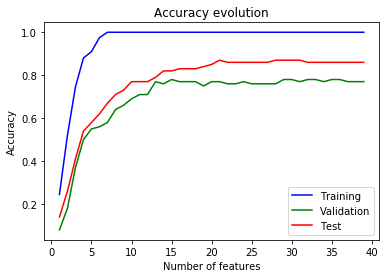

Number optimum of features: 15
The optimum test accuracy is  82.00%


In [17]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn.cross_decomposition import PLSSVD

N_feat_max = n_classes # As many new features as classes minus 1
# 1. Obtain PLS projections
pls = PLSSVD(n_components=N_feat_max)
pls.fit(X_train,Y_train_bin)
X_train_pls = pls.transform(X_train)
X_val_pls = pls.transform(X_val)
X_test_pls = pls.transform(X_test)

# 2. Compute and plot accuracy evolution
rang_feat = np.arange(1, N_feat_max, 1) 
[acc_tr, acc_val, acc_test] = SVM_accuracy_evolution(X_train_pls, Y_train, X_val_pls, Y_val, X_test_pls, Y_test, rang_feat)
plt.figure()
plot_accuracy_evolution(rang_feat, acc_tr, acc_val, acc_test)
plt.show()

# 3. Find the optimum number of features
pos_max = np.argmax(acc_val)
num_opt_feat = rang_feat[pos_max]
test_acc_opt = acc_test[pos_max]

print 'Number optimum of features: ' + str(num_opt_feat)
print("The optimum test accuracy is  %2.2f%%" %(100*test_acc_opt))

In [18]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST Training and test data generation
Test.assertEquals(num_opt_feat, 15, 'incorrect result: number of optimum dimensions is uncorrect')
Test.assertEquals(np.round(test_acc_opt,4), 0.8200, 'incorrect result: test accuracy is uncorrect')


1 test passed.
1 test passed.


** Canonical Correlation Analysis (CCA) **

CCA algorithm is also a supervised MVA approach,  since it searches for the directions of maximum correlation between input and output data.

In the next cell, let's repeat the previous steps to obtain the accuracy evolution with the number of features, but using the CCA algorithm.

To implement it, one could use the method [CCA()](http://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.CCA.html); however, this implementation of Scikit-Learn presents some convergence problems when more than just a few eigenvectors are computed. So, you can use the CCA implementation that is included in the library mva.py (you can find it in the same repository than this notebook); the first lines of the following cell explain how to call and use this CCA implementation.  

Note: this implementation includes a regularization penalty. For this experiment, set its value to 1e-2; however, take into account that you should crossvalidate it for a real application.

Maximum number of new projections fixed to 39


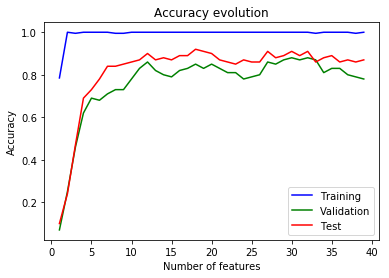

Number optimum of features: 30
The optimum test accuracy is  91.00%


In [19]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
from lib.mva import mva
N_feat_max = n_classes # As many new features as classes minus 1
# 1. Obtain CCA projections
CCA = mva ('CCA', N_feat_max)
CCA.fit(X_train, Y_train_bin, reg= 1e-2)
X_train_cca = CCA.transform(X_train)
X_val_cca = CCA.transform(X_val)
X_test_cca = CCA.transform(X_test)

# 2. Compute and plot accuracy evolution
rang_feat = np.arange(1, N_feat_max, 1)
[acc_tr, acc_val, acc_test] = SVM_accuracy_evolution(X_train_cca, Y_train, X_val_cca, Y_val, X_test_cca, Y_test, rang_feat)
plt.figure()
plot_accuracy_evolution(rang_feat, acc_tr, acc_val, acc_test)
plt.show()

# 3. Find the optimum number of features
pos_max = np.argmax(acc_val)
num_opt_feat = rang_feat[pos_max]
test_acc_opt = acc_test[pos_max]

print 'Number optimum of features: ' + str(num_opt_feat)
print("The optimum test accuracy is  %2.2f%%" %(100*test_acc_opt))

In [20]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST Training and test data generation
Test.assertEquals(num_opt_feat, 33, 'incorrect result: number of optimum dimensions is uncorrect')
Test.assertEquals(np.round(test_acc_opt,4), 0.9300, 'incorrect result: test accuracy is uncorrect')


1 test failed. incorrect result: number of optimum dimensions is uncorrect
1 test failed. incorrect result: test accuracy is uncorrect


** Linear Discrimination Analysis (LDA) **

The last feature extraction method to study in this notebook is the Linear Discrimination Analysis (LDA). LDA is known as a generative classifier based on considering data are generated from gaussian distributions and obtaining the optimal (bayes) solution  under this assumption. When the bayes solution is obtained, one can obtain as many separability hyperplanes as number of classes to classify minus one. The projection of the data over these hyperplanes provides us a dimensionality reduction and, therefore, a feature extraction approach.

Use the [LDA()](http://scikit-learn.org/stable/modules/generated/sklearn.lda.LDA.html) method to implement this approach. Remember that, in classification problems, CCA is equivalent to LDA, so you shpuld obtain similar results to those of the previous section.


C:\Users\Alex\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


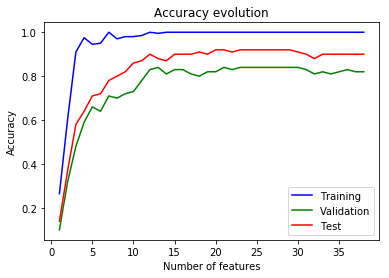

Number optimum of features: 13
The optimum test accuracy is  88.00%


In [21]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

N_feat_max = n_classes -1 # As many new features as classes minus 1
# 1. Obtain LDA or CCA projections
cca = LinearDiscriminantAnalysis(n_components=N_feat_max)
cca.fit(X_train,Y_train)
X_train_cca = cca.transform(X_train)
X_val_cca = cca.transform(X_val)
X_test_cca = cca.transform(X_test)

# 2. Compute and plot accuracy evolution
rang_feat = np.arange(1, N_feat_max, 1)
[acc_tr, acc_val, acc_test] = SVM_accuracy_evolution(X_train_cca, Y_train, X_val_cca, Y_val, X_test_cca, Y_test, rang_feat)
plt.figure()
plot_accuracy_evolution(rang_feat, acc_tr, acc_val, acc_test)
plt.show()

# 3. Find the optimum number of features
pos_max = np.argmax(acc_val)
num_opt_feat = rang_feat[pos_max]
test_acc_opt = acc_test[pos_max]

print 'Number optimum of features: ' + str(num_opt_feat)
print("The optimum test accuracy is  %2.2f%%" %(100*test_acc_opt))

In [22]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST Training and test data generation
Test.assertEquals(num_opt_feat, 13, 'incorrect result: number of optimum dimensions is uncorrect')
Test.assertEquals(np.round(test_acc_opt,4), 0.9000, 'incorrect result: test accuracy is uncorrect')


1 test passed.
1 test failed. incorrect result: test accuracy is uncorrect
